# Predictive Modeling of Customer Bookings

### Data Description

The Customer Booking dataset contains lots of features listed below:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [73]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
# reading the dataset into a dataframe
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# viewing the first 10 rows in the dataset
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [75]:
# overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

## Data Exploration and visualization

* _What is the size of the datasets_?

In [76]:
# Check the size of the dataset
print("The Shape of the Dataset is: ")
print(df.shape)
print("")

The Shape of the Dataset is: 
(50000, 14)



#### Inference

We can see that there are 50,000 Customer's Booking in the datasets

* _Any missing data?_

In [77]:
# checking for missing values
print("The Distribution of Missing Values: ")
print(df.isnull().sum())
print("")

The Distribution of Missing Values: 
num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64



#### Inference

There are no missing data

* _What is the data type of each column?_

In [78]:
# datatype for each column
print("The Datatypes for Each Column are: ")
print(df.dtypes)

The Datatypes for Each Column are: 
num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object


#### Inference

We can see that the columns have int, object and floats as their datatype.

In [79]:
# checking for column names
print("Names of each Columns in The Datasets are: ")
print(df.columns)

Names of each Columns in The Datasets are: 
Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [80]:
# summary statistics
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


- _Are there outliers?_

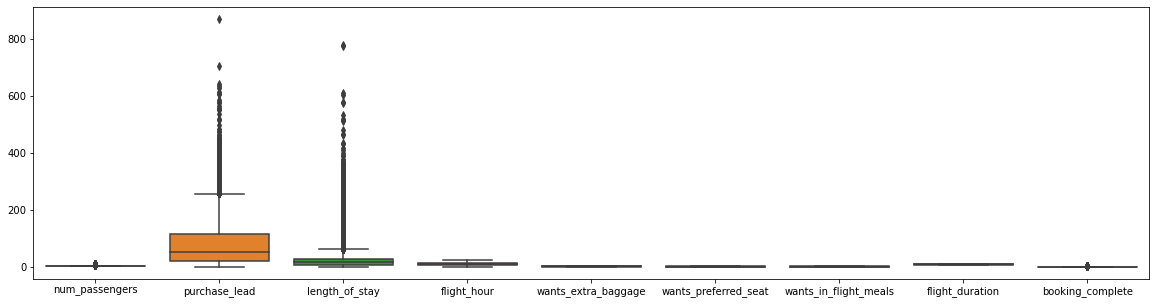

In [81]:
# Visualizing Outliers Using Box Plot
plt.figure(figsize=(20,5))
sns.boxplot(data = df)
plt.show()

#### Inference

We can clearly see from the boxplot that there are outliners. For purchase lead, we see that values above 200 are acting as outliers.

### Questions that would be used to investigate to further understand the dataset

#### 1. How does the number of passengers vary across different sales channels?


In [82]:
# performing a groupby on sales_channel and num_passengers
passenger_count_by_channel = df.groupby("sales_channel")["num_passengers"].sum()

passenger_count_by_channel

sales_channel
Internet    70662
Mobile       8900
Name: num_passengers, dtype: int64

#### Inference

Here, we see that sales channel used by most passengers for booking is the Internet followed by Mobile

#### 2. What is the distribution of bookings made by customers?

In [83]:
# value counts for booking complete
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Text(0.5, 1.0, 'Distribution of Customers with Complete Booking')

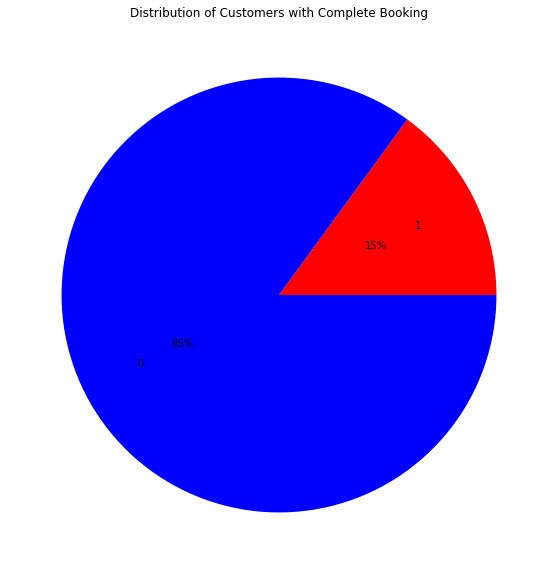

In [84]:
plt.figure(figsize=(10,10))
plt.pie(x=[7478, 42522], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','b'])
plt.title('Distribution of Customers with Complete Booking')

#### Inference

From the distribution plot, we can clearly see that out of 50,000 British Airways customer bookings, 42,522 is marked as complete while 7,478 is not complete. Also the plot reveals tha the dataset is unbalanced, so there would need for tecnique used to balance the dataset.

### 3. What is the distribution of trip types in the dataset?

In [85]:
# the distribution of trip types
trip_type_distribution = df["trip_type"].value_counts()

trip_type_distribution

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

#### Inference

From the distribution of trip types, we can see that there are 49497 RoundTrip bookings, 387 OneWay bookings and 116 CircleTrip bookings. This means that most passengers prefer RoundTrip bookings than oneWay and CircleTrip.

### 4. How does the distribution of trip types vary across different sales channels?

In [86]:
# distribution of trip types across different sales channels?
trip_type_distribution_by_channel = df.groupby(["sales_channel", "trip_type"]).size().unstack()

trip_type_distribution_by_channel

trip_type,CircleTrip,OneWay,RoundTrip
sales_channel,,,
Internet,112,369,43901
Mobile,4,18,5596


#### Inference

From the distribution of trip types across different sales channels, we can see that the sales channel with more bookings is Internet.

### 5. Which routes have the highest demand for extra baggage,  preferred seats or in flight meals?

In [87]:
# Top 10 routes with extra baggage, preferred seats or wants in flight meals?
routes_with_high_demand = df[(df["wants_extra_baggage"] == 1) | (df["wants_preferred_seat"] == 1) | (df["wants_in_flight_meals"] == 1)]["route"].value_counts()

routes_with_high_demand.head(10)

AKLKUL    2072
MELSGN     735
PENTPE     716
DMKKIX     599
ICNSYD     587
MELPEN     574
MELTPE     567
ICNSIN     555
SGNSYD     546
DMKOOL     507
Name: route, dtype: int64

#### Inference

We see that the Top 10 routes with extra baggage, preferred seats or wants in flight meals are; AKLKUL, MELSGN, PENTPE, DMKKIX, ICNSYD, MELPEN, MELTPE, ICNSIN, SGNSYD and DMKOOL

### 6. What is the passengers flight bookings for top 10 Countries?

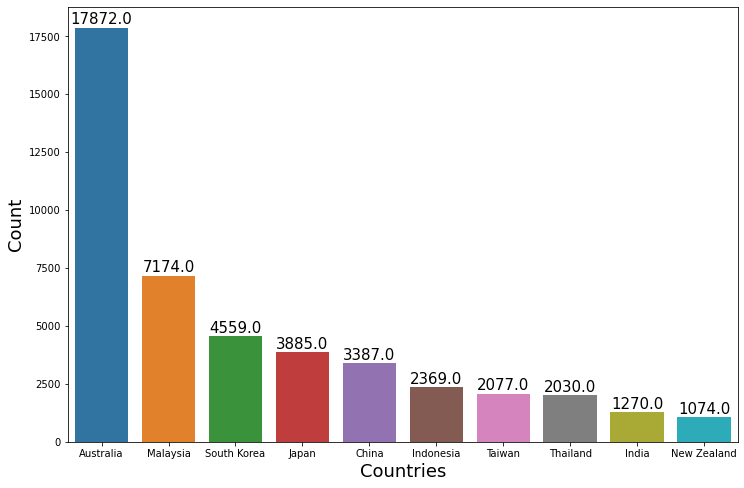

In [88]:
# Top 10 Countries in flight bookings
plt.figure(figsize=(12,8))
plots = sns.countplot(x="booking_origin",  data=df ,order=df.booking_origin.value_counts().iloc[:10].index)
plt.xlabel("Countries",fontsize= 18)
plt.ylabel("Count", fontsize= 18)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                   ha='center', va='center',size=15, xytext=(0, 8),textcoords='offset points')   

#### Inference

We see from the plot above that top 10 Countries where bookings was made is Australia having the highest number, followed by Malaysia and New Zealand having the lowest. 

### 7. What is the number of flights on each day of the week?

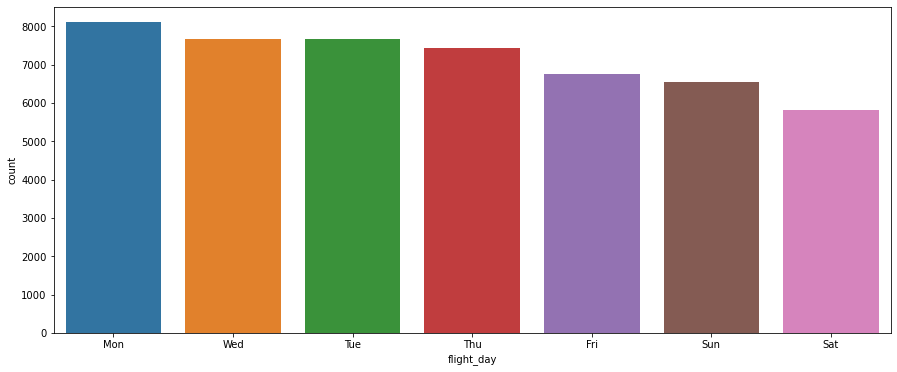

In [89]:
# flights on each day of the week
plt.figure(figsize=(15,6))
sns.countplot(x = "flight_day", data=df, order=df["flight_day"].value_counts().index)
plt.show()

#### Inference

We see from the plot above that Monday has the highest followed by wednesday, Tuesday and Thursday. However, saturday has the lowest flight day.

### 8. What is the distribution of flight hour?

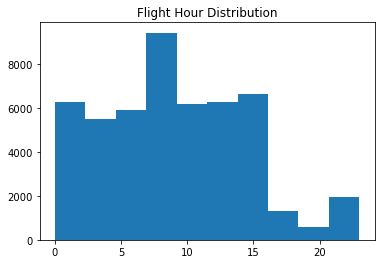

In [90]:
# histogram of flight hour
plt.hist(df['flight_hour'])
 
plt.title("Flight Hour Distribution")
 
# Adding the legends
plt.show()

#### Inference

We see from the plot above that the highest flight hour is between 8-10 hours.

###  9. Is there a correlation between the features?

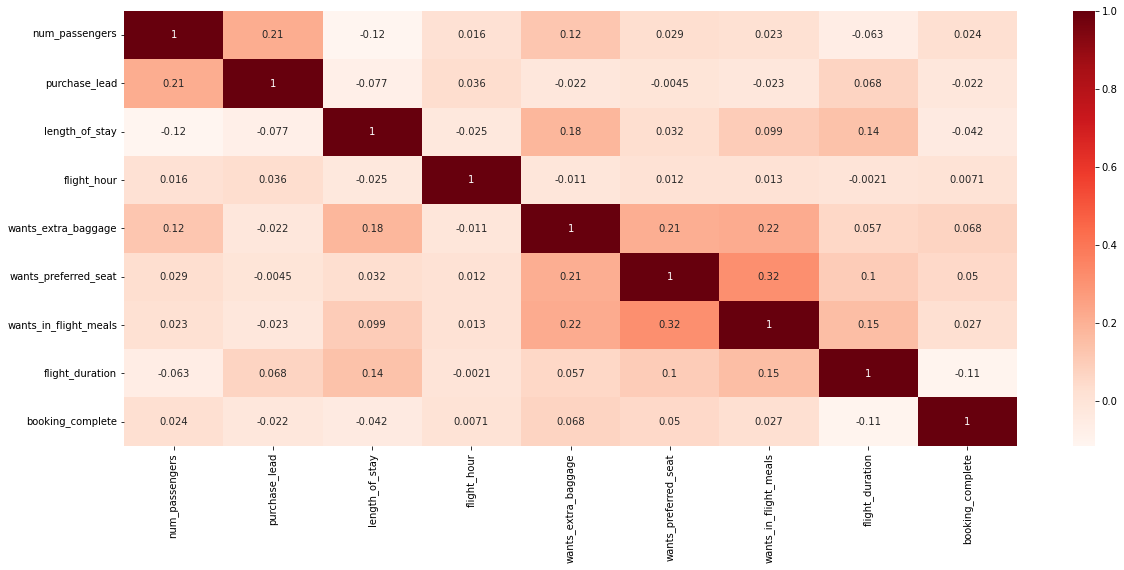

In [91]:
# Plotting heatmap 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr() , annot=True, cmap="Reds")
plt.show()

In [92]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [93]:
# Separating categorical and numerical columns
cat_df = df.select_dtypes(include="object")
num_df = df.select_dtypes(exclude="object")

In [94]:
# reading the first 5 categorical data
cat_df.head()

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [95]:
# reading the first 5 numerical data
num_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


- Replacing Outliers Using Median

In [96]:
#function that returns a list of outliers and replace them with the meadian value
num_columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']

''' Detection '''
# IQR
# Calculate the upper and lower limits
for df in num_columns:
    Q1= num_df[df].quantile(0.25)
    Q3 =num_df[df].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR
  
    # replace outliers with meadian value
    median = num_df[df].median()
    
    # Create arrays of Boolean values indicating the outlier rows
    num_df[df] = np.where(num_df[df]< lower_limit, median,num_df[df])
    num_df[df] = np.where(num_df[df]> upper_limit, median,num_df[df])

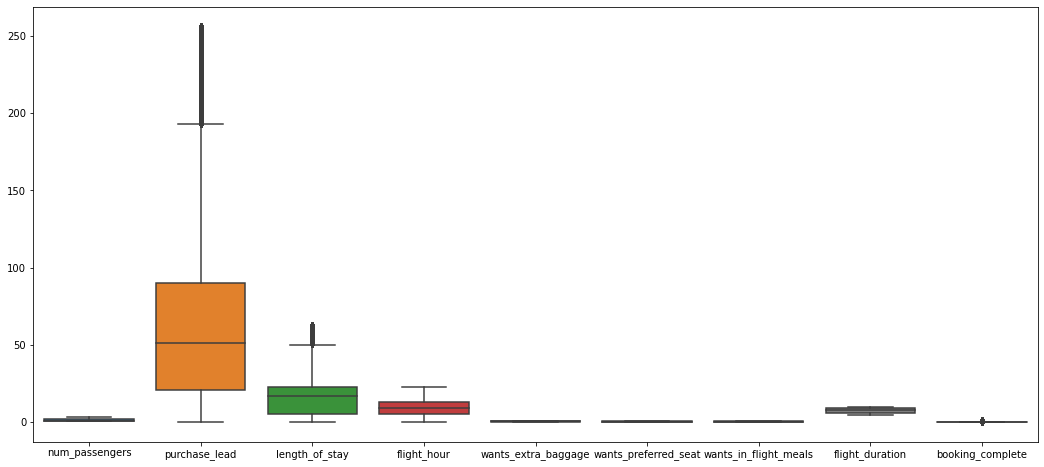

In [97]:
# Plotting boxplot replaced outliers
plt.figure(figsize=(18,8))
sns.boxplot(data = num_df)
plt.show()

## Model Building

* Feature Encoding

In [98]:
# One-Hot Encoding - The categorical feature is not ordinal
columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
for value in columns:
    cat_df=pd.get_dummies(cat_df, columns=[value],drop_first=True)

In [99]:
# combining the categorical and numerical data
data = pd.concat([cat_df,num_df], axis =1)

data.head()

,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,...,booking_origin_Vietnam,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,0,1,0,1,0,0,0,0,0,...,0,2.0,51.0,19.0,7.0,1.0,0.0,0.0,5.52,0
1,0,0,1,0,1,0,0,0,0,0,...,0,1.0,112.0,20.0,3.0,0.0,0.0,0.0,5.52,0
2,0,0,1,0,0,0,0,0,1,0,...,0,2.0,243.0,22.0,17.0,1.0,1.0,0.0,5.52,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1.0,96.0,31.0,4.0,0.0,0.0,1.0,5.52,0
4,0,0,1,0,0,0,0,0,1,0,...,0,2.0,68.0,22.0,15.0,1.0,0.0,1.0,5.52,0


In [100]:
# Spliting the data into features and target
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(X.shape)
print(y.shape)

(50000, 918)
(50000,)


In [102]:
# Using StandardScaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# using imblearn to removing imablance in our dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_scaled, y)
print(x_smote.shape)
print(y_smote.shape)

(85044, 918)
(85044,)


### Training  The Model

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

* What is the accuracy of the model?

In [105]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8539

#### Inference

Our RandomForestClassifier model provided an accuracy measure of 85.39%

* Cross-Validation Scores

In [106]:
# Perform cross-validation to prevent overfitting
scores = cross_val_score(rf, X, y, cv=5)

# Output evaluation metrics
print('Cross-Validation Scores:', scores)
print('Mean Score:', scores.mean())
print('Standard Deviation:', scores.std())

Cross-Validation Scores: [0.8498 0.7826 0.7093 0.5263 0.7683]
Mean Score: 0.72726
Standard Deviation: 0.1099730257835984


In [107]:
# Fit the model on the entire dataset
rf.fit(X, y)

# Make predictions on the entire dataset
y_pred = rf.predict(X)

# Output classification report
print('Classification Report:')
print(classification_report(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42522
           1       1.00      1.00      1.00      7478

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation metrics
accuracy = scores.mean()
precision = precision_score(y, rf.predict(X))
recall = recall_score(y, rf.predict(X))
f1 = f1_score(y, rf.predict(X))

# Compute feature importance
feature_importance = rf.feature_importances_

accuracy, precision, recall, f1, feature_importance

(0.72726,
 0.9991974317817014,
 0.9989301952393688,
 0.9990637956399624,
 array([1.11723002e-02, 6.72414920e-04, 8.73138491e-04, 1.74444070e-02,
        1.49508702e-02, 1.51170057e-02, 1.65525961e-02, 1.69945222e-02,
        1.69343948e-02, 2.82697468e-06, 4.74696114e-06, 8.75143088e-05,
        9.16389467e-06, 1.08199709e-05, 4.47948367e-03, 4.14320964e-06,
        2.78895394e-04, 8.59714509e-05, 9.86447368e-05, 4.04702842e-04,
        2.74136279e-04, 1.28586541e-04, 3.27255170e-04, 7.35117895e-05,
        1.01348869e-04, 1.87459671e-06, 6.50761104e-07, 6.10635064e-06,
        1.86527281e-04, 7.12577016e-06, 1.31426711e-05, 1.38333363e-04,
        5.20830989e-04, 4.01542990e-05, 6.96868127e-04, 4.42585429e-04,
        1.49779942e-04, 7.56393497e-05, 2.65180077e-04, 5.75264340e-05,
        3.36119784e-04, 3.02386753e-04, 1.38757739e-04, 5.08965884e-06,
        9.15143122e-06, 3.52441488e-05, 5.80674732e-04, 5.05401888e-04,
        6.07362829e-05, 1.11078737e-03, 3.05429503e-03, 1.24556